In [1]:
import pandas as pd
import seaborn as sb
import requests
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

import matplotlib.pyplot as plt

import warnings            
warnings.filterwarnings("ignore") 

In [2]:
Predict_Cost_HOS = pd.read_csv('data.csv')

In [3]:
Predict_Cost_HOS.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,Payment Typology 2,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,NaN,NaN,267162.0,NaN,NaN,0,N,Y,$5620.00,$4561.28
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,...,NaN,NaN,275408.0,NaN,NaN,0,N,Y,$7404.18,$6933.94
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,...,NaN,NaN,267162.0,NaN,NaN,0,N,Y,$7931.28,$7154.85
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,NaN,NaN,271326.0,NaN,NaN,0,N,Y,$11304.44,$4584.11
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,...,NaN,NaN,243034.0,NaN,NaN,0,N,Y,$8330.50,$4361.74


In [4]:
Predict_Cost_HOS.describe()

,Operating Certificate Number,Facility Id,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight
count,2.343849e+06,2.343849e+06,2346760.0,2.346760e+06,2.346760e+06,2.346760e+06,2.346760e+06,2.346760e+06,2.343849e+06,1.733912e+06,7.133600e+04,2.346760e+06
mean,5.007196e+06,1.043335e+03,2015.0,1.905531e+02,1.127790e+02,4.181138e+02,1.042892e+01,2.010595e+00,2.176429e+06,2.528763e+06,1.297207e+07,3.264275e+02
std,2.259460e+06,7.134138e+02,0.0,1.596109e+02,8.893687e+01,2.413368e+02,5.923686e+00,8.973762e-01,1.201747e+07,1.290688e+07,2.991695e+07,1.000147e+03
min,1.010000e+05,1.000000e+00,2015.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.150000e+02,7.100000e+01,1.307000e+03,0.000000e+00
25%,2.951001e+06,5.410000e+02,2015.0,1.060000e+02,0.000000e+00,2.010000e+02,5.000000e+00,1.000000e+00,1.923180e+05,1.855150e+05,1.835760e+05,0.000000e+00
50%,5.907001e+06,1.099000e+03,2015.0,1.590000e+02,1.320000e+02,3.830000e+02,9.000000e+00,2.000000e+00,2.294950e+05,2.230620e+05,2.271450e+05,0.000000e+00
75%,7.002012e+06,1.450000e+03,2015.0,2.180000e+02,2.160000e+02,6.400000e+02,1.500000e+01,3.000000e+00,2.579130e+05,2.534160e+05,2.634160e+05,0.000000e+00
max,7.004010e+06,9.431000e+03,2015.0,9.170000e+02,9.990000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.100000e+07,9.100000e+07,9.060222e+07,9.900000e+03


In [5]:
Predict_Cost_HOS.isnull().sum()

Health Service Area                       2911
Hospital County                           2911
Operating Certificate Number              2911
Facility Id                               2911
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       4427
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [6]:
HOS_drp = Predict_Cost_HOS.drop(['Other Provider License Number','Payment Typology 2','Payment Typology 3','Operating Provider License Number'], axis=1)

In [7]:
HOS_drp['Length of Stay'] = HOS_drp['Length of Stay'].apply(lambda x: str(x).split(' ')[0])
HOS_drp['Length of Stay'] = pd.to_numeric(HOS_drp['Length of Stay'])

In [8]:
HOS_drp['Total Costs'] = HOS_drp['Total Costs'].apply(lambda x: str(x).replace('$',''))
HOS_drp['Total Costs'] = pd.to_numeric(HOS_drp['Total Costs'])
HOS_drp['Total Charges'] = HOS_drp['Total Charges'].apply(lambda x: str(x).replace('$',''))
HOS_drp['Total Charges'] = pd.to_numeric(HOS_drp['Total Charges'])

In [9]:
HOS_drp['Zip Code - 3 digits'] = HOS_drp['Zip Code - 3 digits'].apply(lambda x: str(x).replace('OOS','999'))  

In [10]:
HOS_df = HOS_drp

In [11]:
display(HOS_df)

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Attending Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Minor,Medical,Medicaid,267162.0,0,N,Y,5620.00,4561.28
1,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,18 to 29,147,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicaid,275408.0,0,N,Y,7404.18,6933.94
2,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,30 to 49,147,M,White,Not Span/Hispanic,...,Minor,Minor,Medical,Medicaid,267162.0,0,N,Y,7931.28,7154.85
3,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Minor,Medical,Medicare,271326.0,0,N,Y,11304.44,4584.11
4,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,50 to 69,147,M,White,Not Span/Hispanic,...,Moderate,Moderate,Medical,Medicaid,243034.0,0,N,Y,8330.50,4361.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346755,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Moderate,Medical,Medicare,201565.0,0,N,Y,43494.00,6637.09
2346756,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,117,M,White,Not Span/Hispanic,...,Minor,Minor,Medical,Private Health Insurance,251080.0,0,N,Y,16662.00,3236.18
2346757,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,119,M,White,Unknown,...,Minor,Minor,Medical,Medicaid,198807.0,0,N,N,7142.00,1862.39
2346758,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Minor,Moderate,Medical,Medicare,268633.0,0,N,Y,13070.00,2744.13


In [12]:
HOS_df.corr()

,Operating Certificate Number,Facility Id,Length of Stay,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Birth Weight,Total Charges,Total Costs
Operating Certificate Number,1.000000,0.671524,0.019714,NaN,0.037448,0.182555,0.041849,0.043044,-0.040322,0.014902,0.016439,0.079524,0.089597
Facility Id,0.671524,1.000000,0.004757,NaN,0.023691,0.165248,0.049934,0.047960,-0.048919,-0.011602,0.064584,0.043589,0.039120
Length of Stay,0.019714,0.004757,1.000000,NaN,0.112388,0.042046,0.073468,0.101726,0.346425,0.001773,-0.063356,0.705928,0.681629
Discharge Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCS Diagnosis Code,0.037448,0.023691,0.112388,NaN,1.000000,0.117340,0.440336,0.460307,-0.192142,0.046602,0.055458,-0.086585,-0.059475
CCS Procedure Code,0.182555,0.165248,0.042046,NaN,0.117340,1.000000,0.193447,0.189935,-0.016638,-0.004496,0.161024,0.012616,0.021934
APR DRG Code,0.041849,0.049934,0.073468,NaN,0.440336,0.193447,1.000000,0.968637,-0.107512,0.029982,0.294265,-0.095111,-0.071683
APR MDC Code,0.043044,0.047960,0.101726,NaN,0.460307,0.189935,0.968637,1.000000,-0.097684,0.032363,0.249532,-0.061424,-0.038931
APR Severity of Illness Code,-0.040322,-0.048919,0.346425,NaN,-0.192142,-0.016638,-0.107512,-0.097684,1.000000,-0.011360,-0.251183,0.330846,0.287893
Attending Provider License Number,0.014902,-0.011602,0.001773,NaN,0.046602,-0.004496,0.029982,0.032363,-0.011360,1.000000,-0.025072,-0.020664,-0.003412


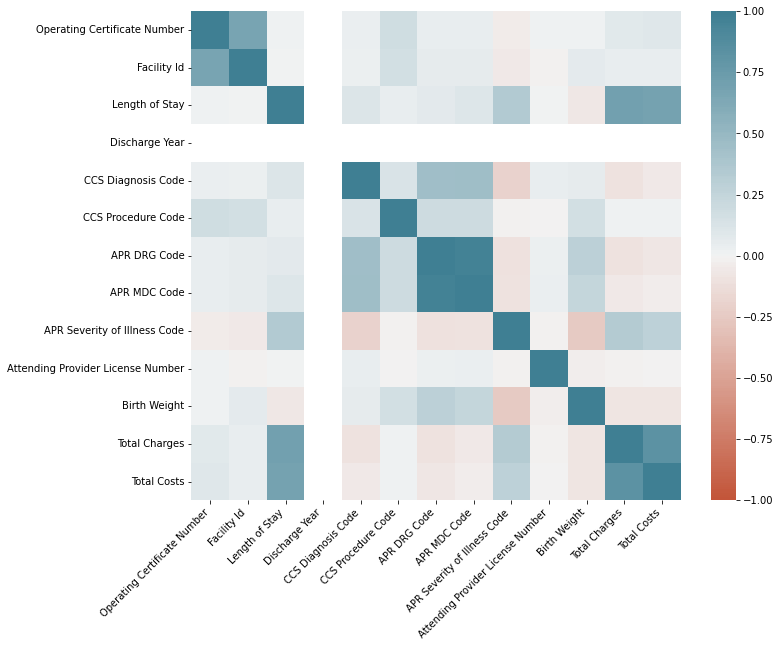

In [13]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
corr = HOS_df.corr()
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

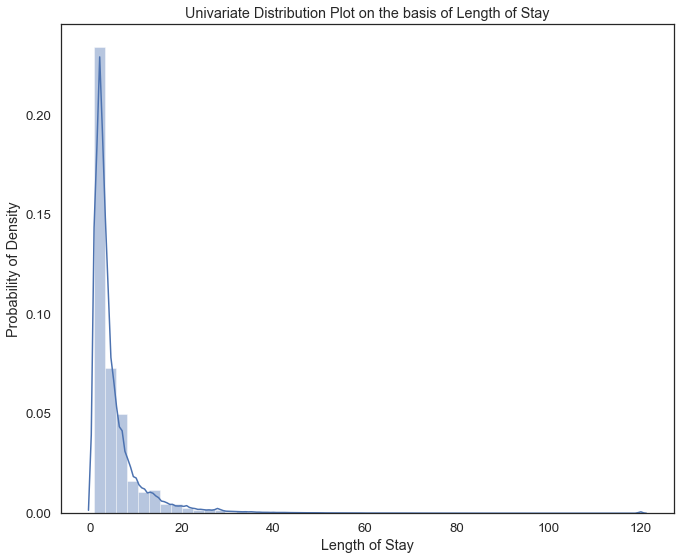

In [14]:
sb.set(font_scale=1.2)
sb.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sb.distplot(HOS_df['Length of Stay'], norm_hist=False);
plt.ylabel('Probability of Density')
plt.title('Univariate Distribution Plot on the basis of Length of Stay')
plt.show()

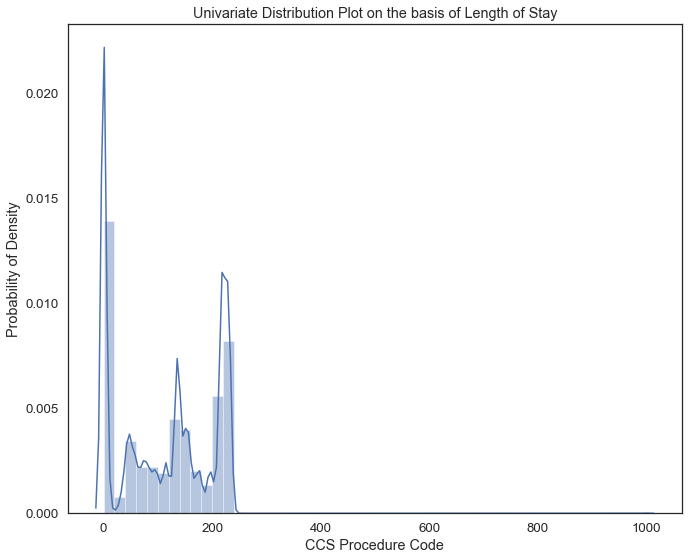

In [15]:
sb.set(font_scale=1.2)
sb.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sb.distplot(HOS_df['CCS Procedure Code'], norm_hist=False);
plt.ylabel('Probability of Density')
plt.title('Univariate Distribution Plot on the basis of Length of Stay')
plt.show()

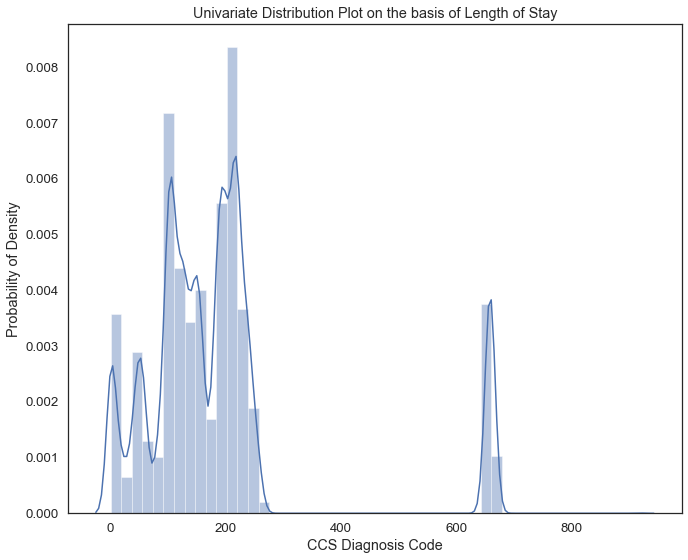

In [16]:
sb.set(font_scale=1.2)
sb.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sb.distplot(HOS_df['CCS Diagnosis Code'], norm_hist=False);
plt.ylabel('Probability of Density')
plt.title('Univariate Distribution Plot on the basis of Length of Stay')
plt.show()

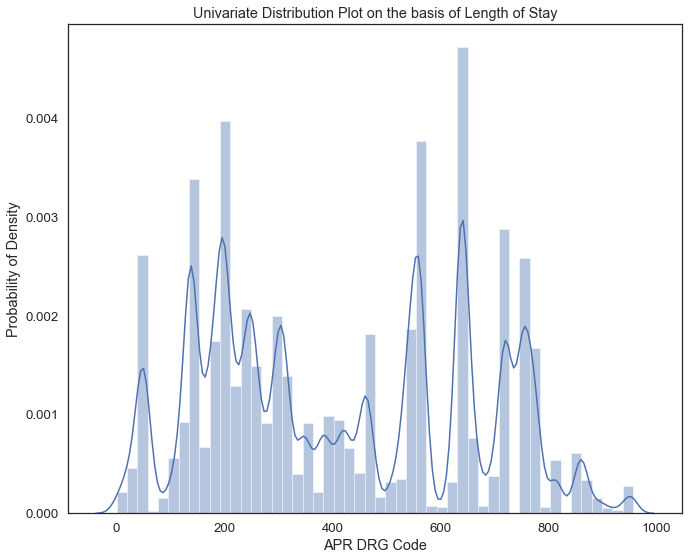

In [17]:
sb.set(font_scale=1.2)
sb.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sb.distplot(HOS_df['APR DRG Code'], norm_hist=False);
plt.ylabel('Probability of Density')
plt.title('Univariate Distribution Plot on the basis of Length of Stay')
plt.show()

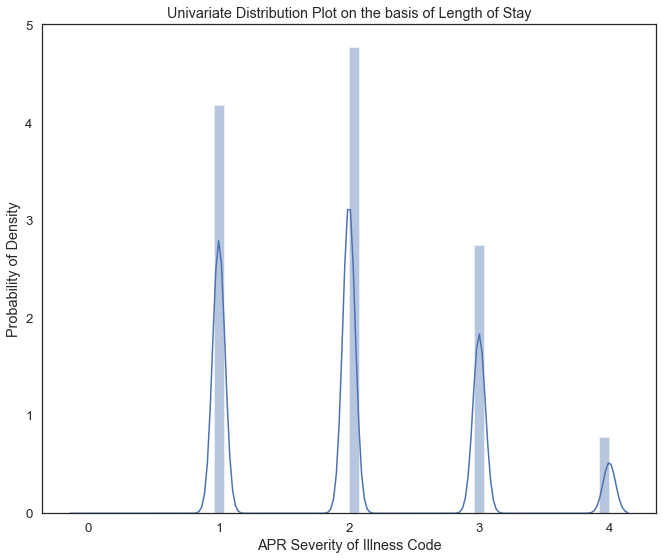

In [18]:
sb.set(font_scale=1.2)
sb.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sb.distplot(HOS_df['APR Severity of Illness Code'], norm_hist=False);
plt.ylabel('Probability of Density')
plt.title('Univariate Distribution Plot on the basis of Length of Stay')
plt.show()

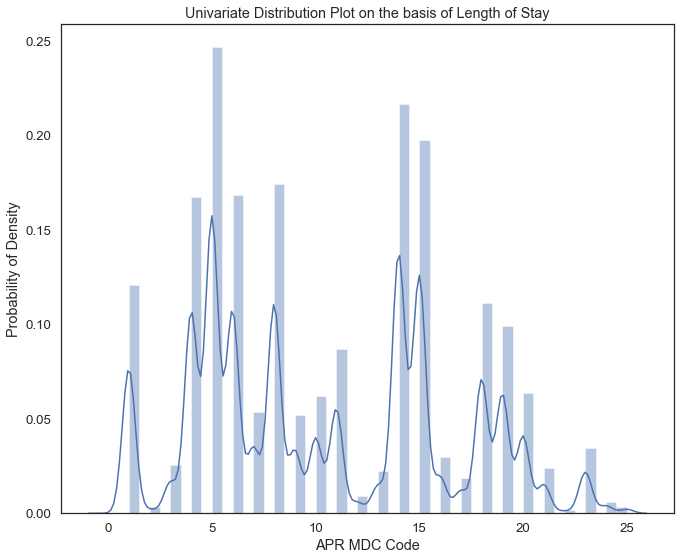

In [19]:
sb.set(font_scale=1.2)
sb.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sb.distplot(HOS_df['APR MDC Code'], norm_hist=False);
plt.ylabel('Probability of Density')
plt.title('Univariate Distribution Plot on the basis of Length of Stay')
plt.show()

In [20]:
birth_weight_DF = HOS_df[['Type of Admission', 'Birth Weight']].groupby('Type of Admission').mean()
display(birth_weight_DF)
weight_AGE_DF = HOS_df[['Age Group', 'Birth Weight']].groupby('Age Group').mean()
display(weight_AGE_DF)

,Birth Weight
Type of Admission,
Elective,5.032418
Emergency,10.296089
Newborn,3258.889476
Not Available,42.710997
Trauma,2.205192
Urgent,47.047211


,Birth Weight
Age Group,
0 to 17,2172.640305
18 to 29,0.000000
30 to 49,0.000000
50 to 69,0.000000
70 or Older,0.000000


<AxesSubplot:xlabel='Birth Weight', ylabel='Length of Stay'>

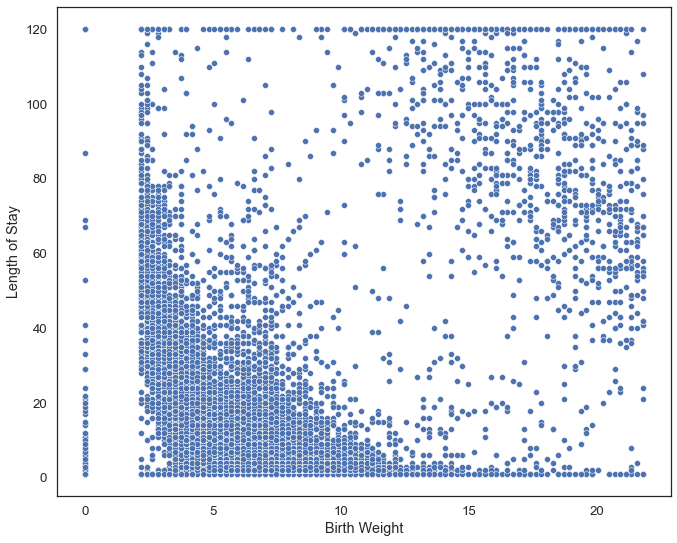

In [21]:
birth_TYPE = HOS_df[HOS_df['Type of Admission'].str.contains('Newborn')]
birth_TYPE['Birth Weight'] = birth_TYPE['Birth Weight'].apply(lambda x: float(x/454)) #convert from grams to pounds
f, ax = plt.subplots(figsize=(11, 9))
sb.scatterplot(x="Birth Weight", y="Length of Stay",
                data=birth_TYPE)

<AxesSubplot:xlabel='Length of Stay', ylabel='APR Severity of Illness Code'>

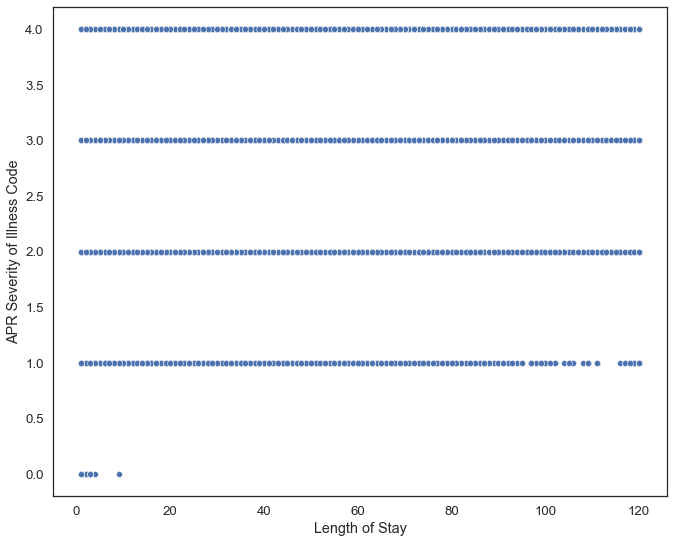

In [22]:
TYPE1 =HOS_df[HOS_df['Type of Admission'].str.contains('Emergency')]
f, ax = plt.subplots(figsize=(11, 9))
sb.scatterplot(x="Length of Stay", y="APR Severity of Illness Code",
                data=TYPE1)

<AxesSubplot:xlabel='Length of Stay', ylabel='APR Severity of Illness Code'>

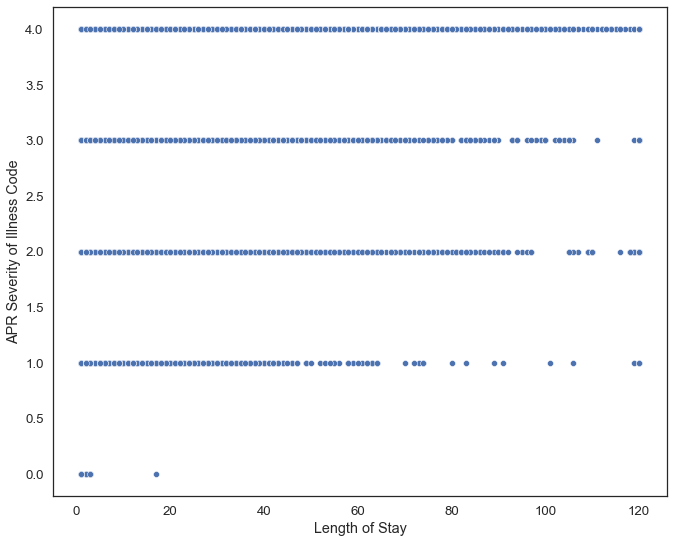

In [23]:
TYPE2 =HOS_df[HOS_df['Type of Admission'].str.contains('Urgent')]
f, ax = plt.subplots(figsize=(11, 9))
sb.scatterplot(x="Length of Stay", y="APR Severity of Illness Code",
                data=TYPE2)

<AxesSubplot:xlabel='Length of Stay', ylabel='APR Severity of Illness Code'>

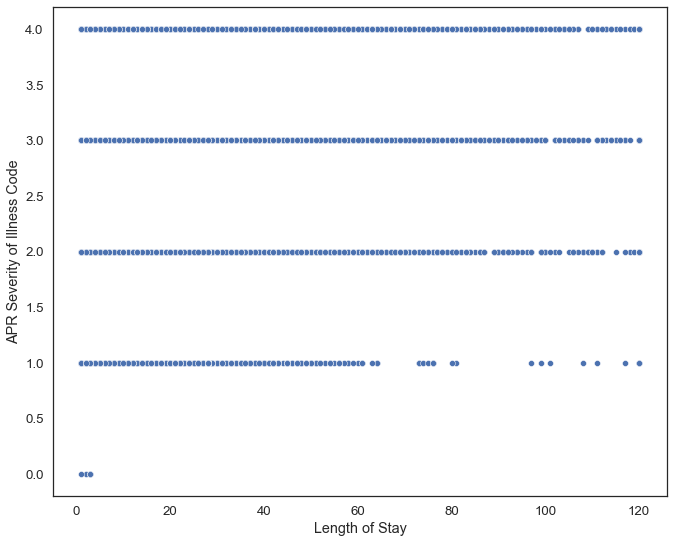

In [24]:
TYPE3 =HOS_df[HOS_df['Type of Admission'].str.contains('Elective')]
f, ax = plt.subplots(figsize=(11, 9))
sb.scatterplot(x="Length of Stay", y="APR Severity of Illness Code",
                data=TYPE3)

<AxesSubplot:xlabel='Length of Stay', ylabel='CCS Diagnosis Code'>

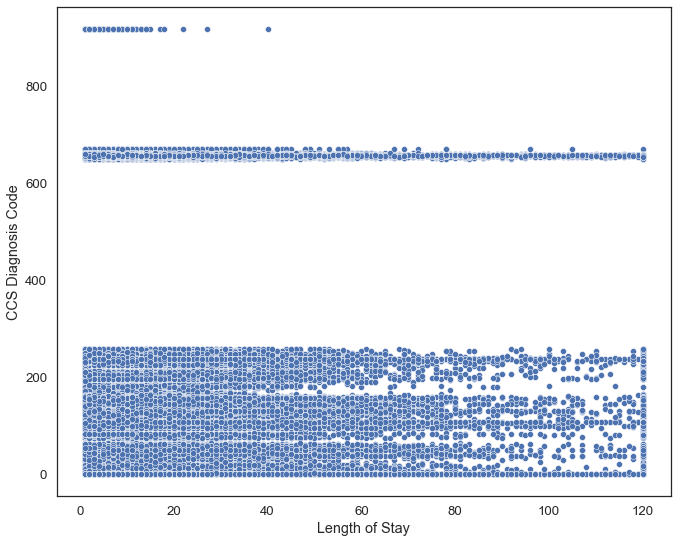

In [25]:
TYPE4 =HOS_df[HOS_df['Type of Admission'].str.contains('Emergency')]
f, ax = plt.subplots(figsize=(11, 9))
sb.scatterplot(x="Length of Stay", y="CCS Diagnosis Code",
                data=TYPE4)

<AxesSubplot:xlabel='Length of Stay', ylabel='APR DRG Code'>

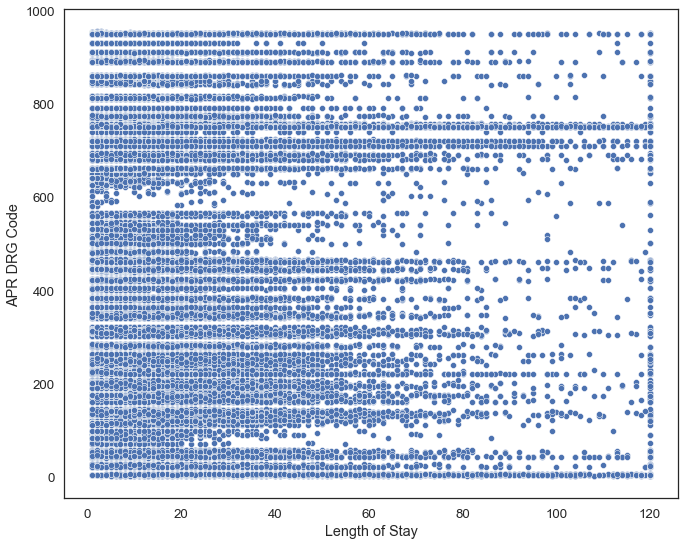

In [26]:
TYPE5 =HOS_df[HOS_df['Type of Admission'].str.contains('Emergency')]
f, ax = plt.subplots(figsize=(11, 9))
sb.scatterplot(x="Length of Stay", y="APR DRG Code",
                data=TYPE5)

<AxesSubplot:xlabel='Length of Stay', ylabel='APR MDC Code'>

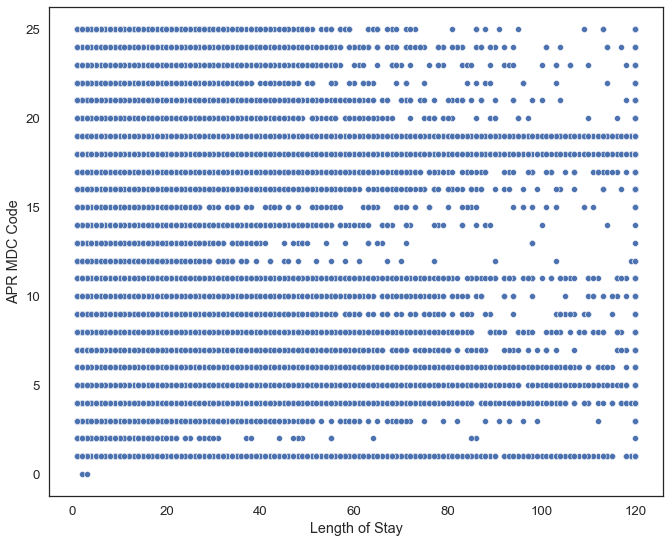

In [27]:
TYPE6 =HOS_df[HOS_df['Type of Admission'].str.contains('Emergency')]
f, ax = plt.subplots(figsize=(11, 9))
sb.scatterplot(x="Length of Stay", y="APR MDC Code",
                data=TYPE6)

In [28]:
APR_Severity= TYPE3[TYPE3['Length of Stay']==120]
display(APR_Severity)

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Attending Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
8071,Western NY,Cattaraugus,401001.0,66.0,Olean General Hospital,50 to 69,147,M,White,Not Span/Hispanic,...,Major,Major,Medical,Medicare,267162.0,0,N,N,105366.50,108977.94
15180,Western NY,Chautauqua,602001.0,103.0,Woman's Christian Association,18 to 29,147,F,White,Not Span/Hispanic,...,Major,Major,Medical,Medicaid,265058.0,0,N,N,107268.35,75779.54
24124,Western NY,Erie,1401014.0,207.0,Buffalo General Hospital,50 to 69,140,M,White,Not Span/Hispanic,...,Extreme,Extreme,Surgical,Private Health Insurance,254778.0,0,N,N,922913.86,379998.85
44530,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,142,F,Black/African American,Not Span/Hispanic,...,Major,Moderate,Medical,Medicaid,260974.0,0,N,N,1435370.42,680601.38
45440,Western NY,Erie,1401014.0,208.0,Women And Children's Hospital Of Buffalo,0 to 17,140,F,Black/African American,Not Span/Hispanic,...,Extreme,Major,Surgical,Medicaid,141845.0,0,N,N,511905.80,322765.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026532,Long Island,Suffolk,5151001.0,245.0,University Hospital,0 to 17,117,M,Black/African American,Not Span/Hispanic,...,Extreme,Major,Surgical,Private Health Insurance,122627.0,7200,N,N,1180286.22,363595.99
2142403,Long Island,Nassau,2951001.0,541.0,North Shore University Hospital,50 to 69,115,F,White,Not Span/Hispanic,...,Extreme,Extreme,Surgical,Medicaid,194588.0,0,N,N,2226614.08,570685.40
2255742,Long Island,Suffolk,5149001.0,896.0,St Charles Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Major,Major,Medical,Medicare,211328.0,0,N,N,816173.00,180661.21
2266496,Long Island,Suffolk,5153000.0,913.0,Huntington Hospital,30 to 49,117,M,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicare,167791.0,0,N,N,534548.90,174393.77


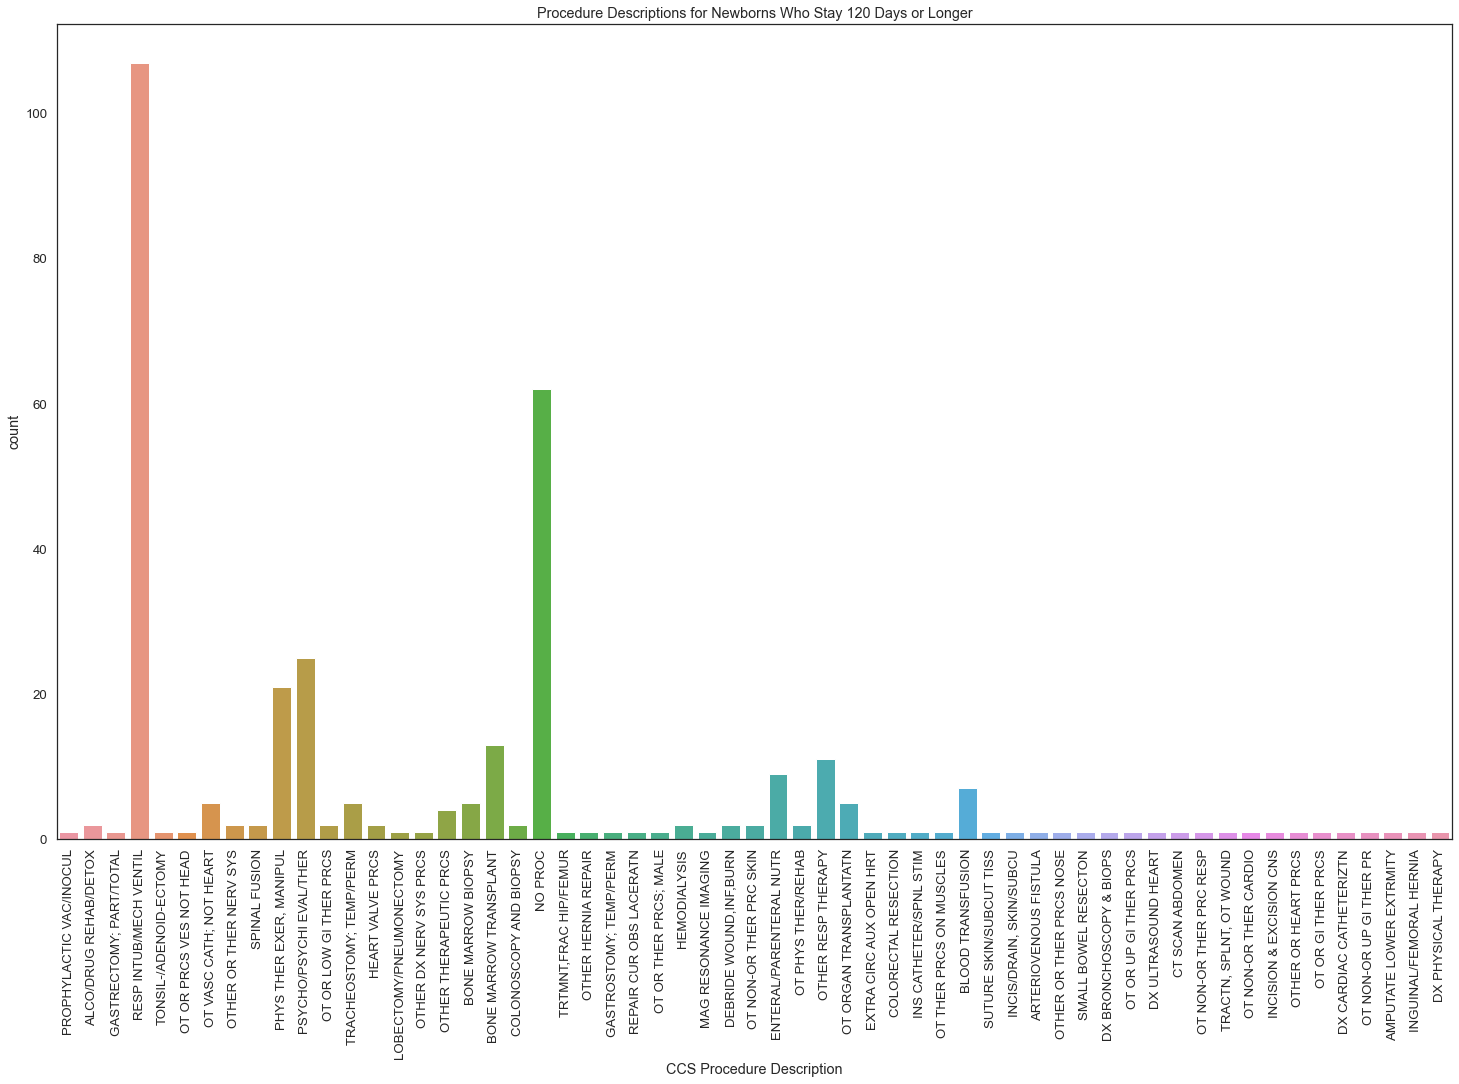

In [29]:
APR_Severity= TYPE3[TYPE3['Length of Stay']==120]

f, ax = plt.subplots(figsize=(25, 15))
sb.countplot(x='CCS Procedure Description', data = APR_Severity )
plt.xticks(rotation=90)
plt.title('Procedure Descriptions for Newborns Who Stay 120 Days or Longer')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Length of Stay'>

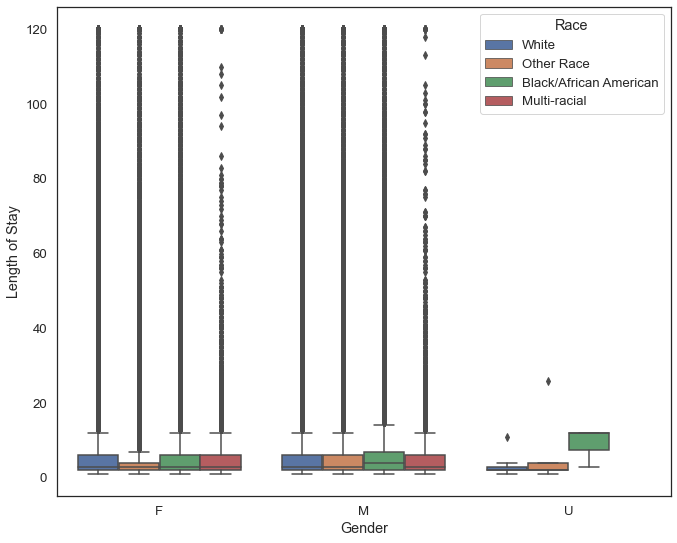

In [30]:
f, ax = plt.subplots(figsize=(11, 9))
sb.boxplot(x="Gender", y="Length of Stay",
            hue="Race",
            data=HOS_df)

[(0.0, 30.0)]

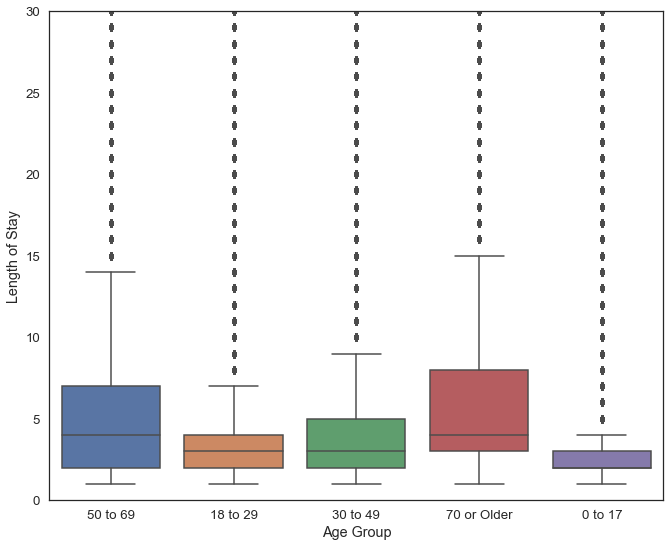

In [31]:
f, ax = plt.subplots(figsize=(11, 9))
sb.boxplot(x="Age Group", y="Length of Stay",
            data=HOS_df)
ax.set(ylim=(0, 30))

[(0.0, 120.0)]

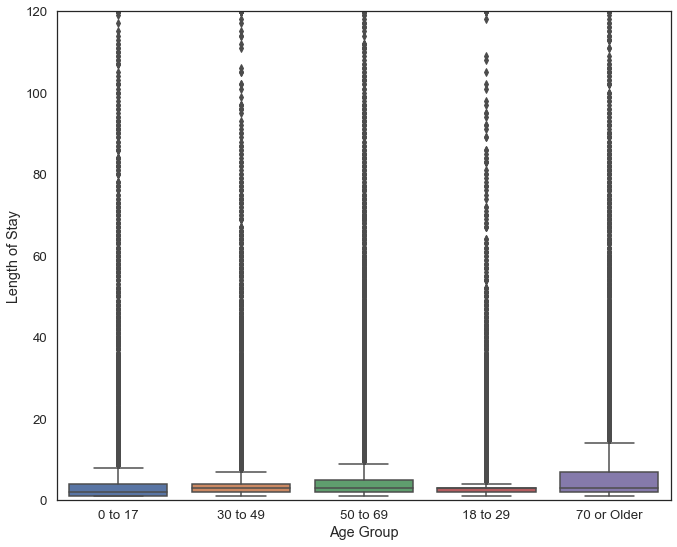

In [32]:
f, ax = plt.subplots(figsize=(11, 9))
sb.boxplot(x="Age Group", y="Length of Stay",
            data=TYPE3)
ax.set(ylim=(0, 120))

[(0.0, 120.0)]

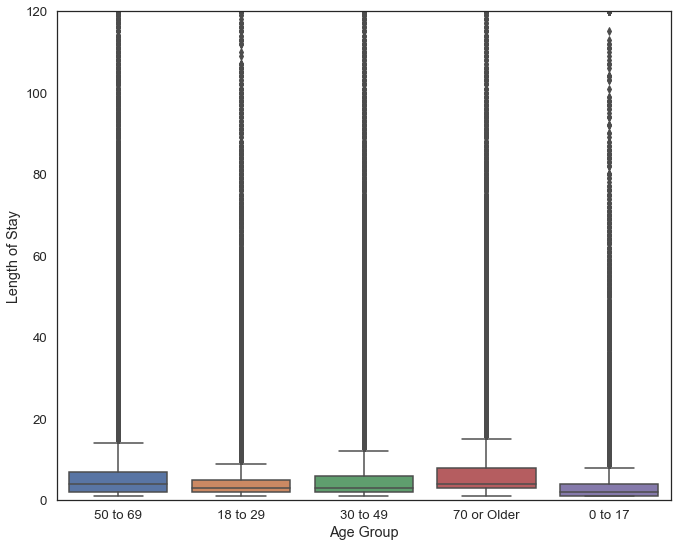

In [33]:
f, ax = plt.subplots(figsize=(11, 9))
sb.boxplot(x="Age Group", y="Length of Stay",
            data=TYPE4)
ax.set(ylim=(0, 120))

[(0.0, 120.0)]

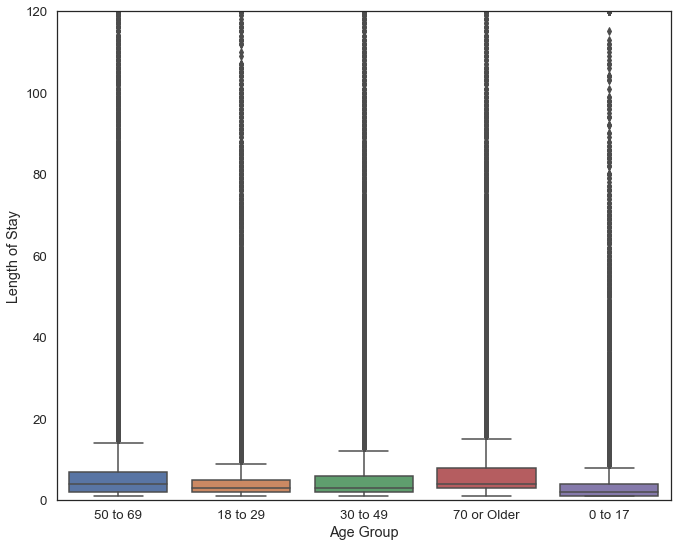

In [34]:
f, ax = plt.subplots(figsize=(11, 9))
sb.boxplot(x="Age Group", y="Length of Stay",
            data=TYPE5)
ax.set(ylim=(0, 120))

[(0.0, 120.0)]

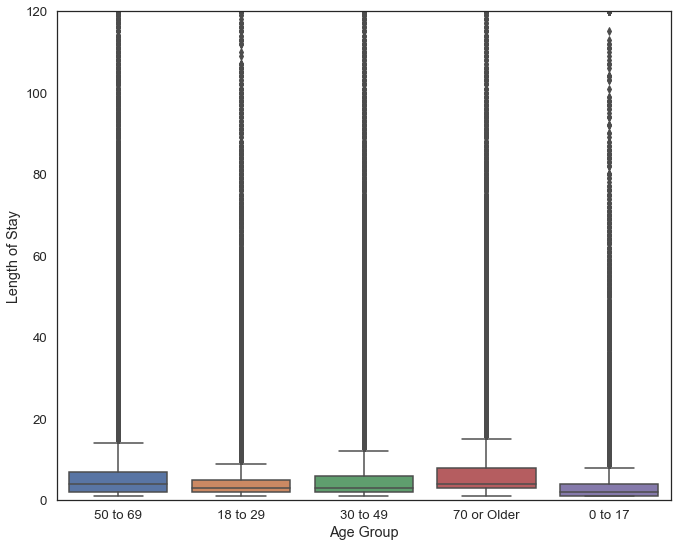

In [35]:
f, ax = plt.subplots(figsize=(11, 9))
sb.boxplot(x="Age Group", y="Length of Stay",
            data=TYPE6)
ax.set(ylim=(0, 120))

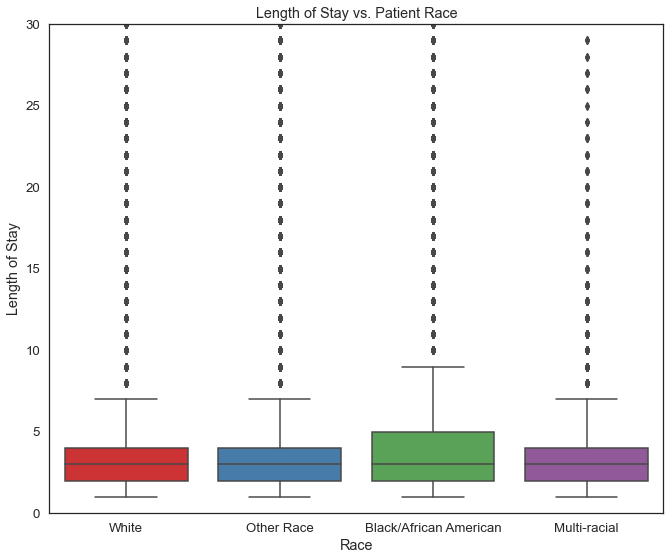

In [36]:
f, ax = plt.subplots(figsize=(11, 9))
sb.boxplot(x="Race", y="Length of Stay", data=TYPE3, palette='Set1')
plt.title('Length of Stay vs. Patient Race')
ax.set(ylim=(0, 30))
plt.show()

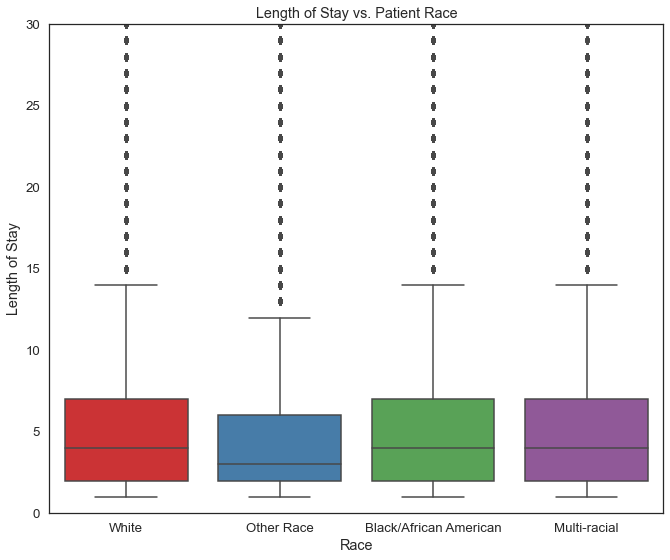

In [37]:
f, ax = plt.subplots(figsize=(11, 9))
sb.boxplot(x="Race", y="Length of Stay", data=TYPE4, palette='Set1')
plt.title('Length of Stay vs. Patient Race')
ax.set(ylim=(0, 30))
plt.show()

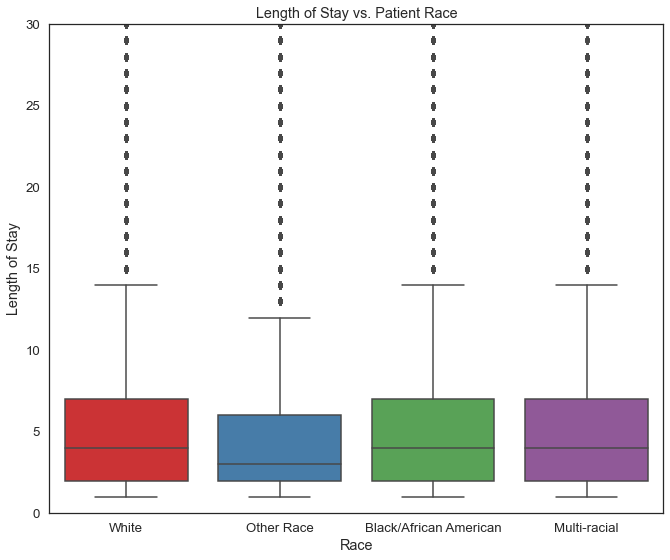

In [38]:
f, ax = plt.subplots(figsize=(11, 9))
sb.boxplot(x="Race", y="Length of Stay", data=TYPE5, palette='Set1')
plt.title('Length of Stay vs. Patient Race')
ax.set(ylim=(0, 30))
plt.show()

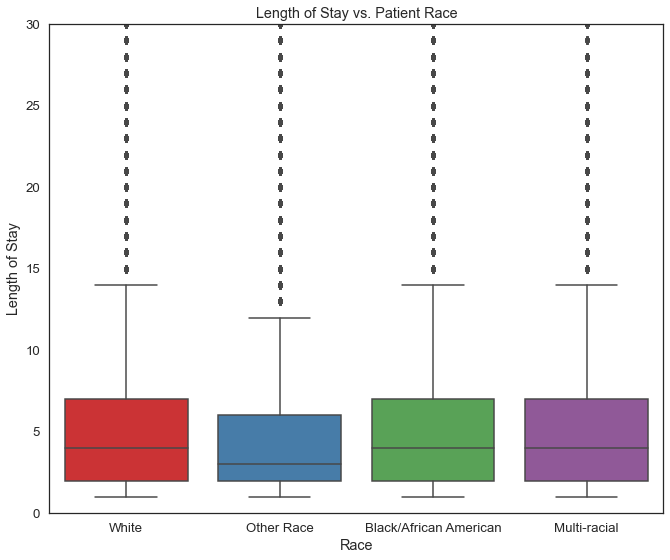

In [39]:
f, ax = plt.subplots(figsize=(11, 9))
sb.boxplot(x="Race", y="Length of Stay", data=TYPE6, palette='Set1')
plt.title('Length of Stay vs. Patient Race')
ax.set(ylim=(0, 30))
plt.show()

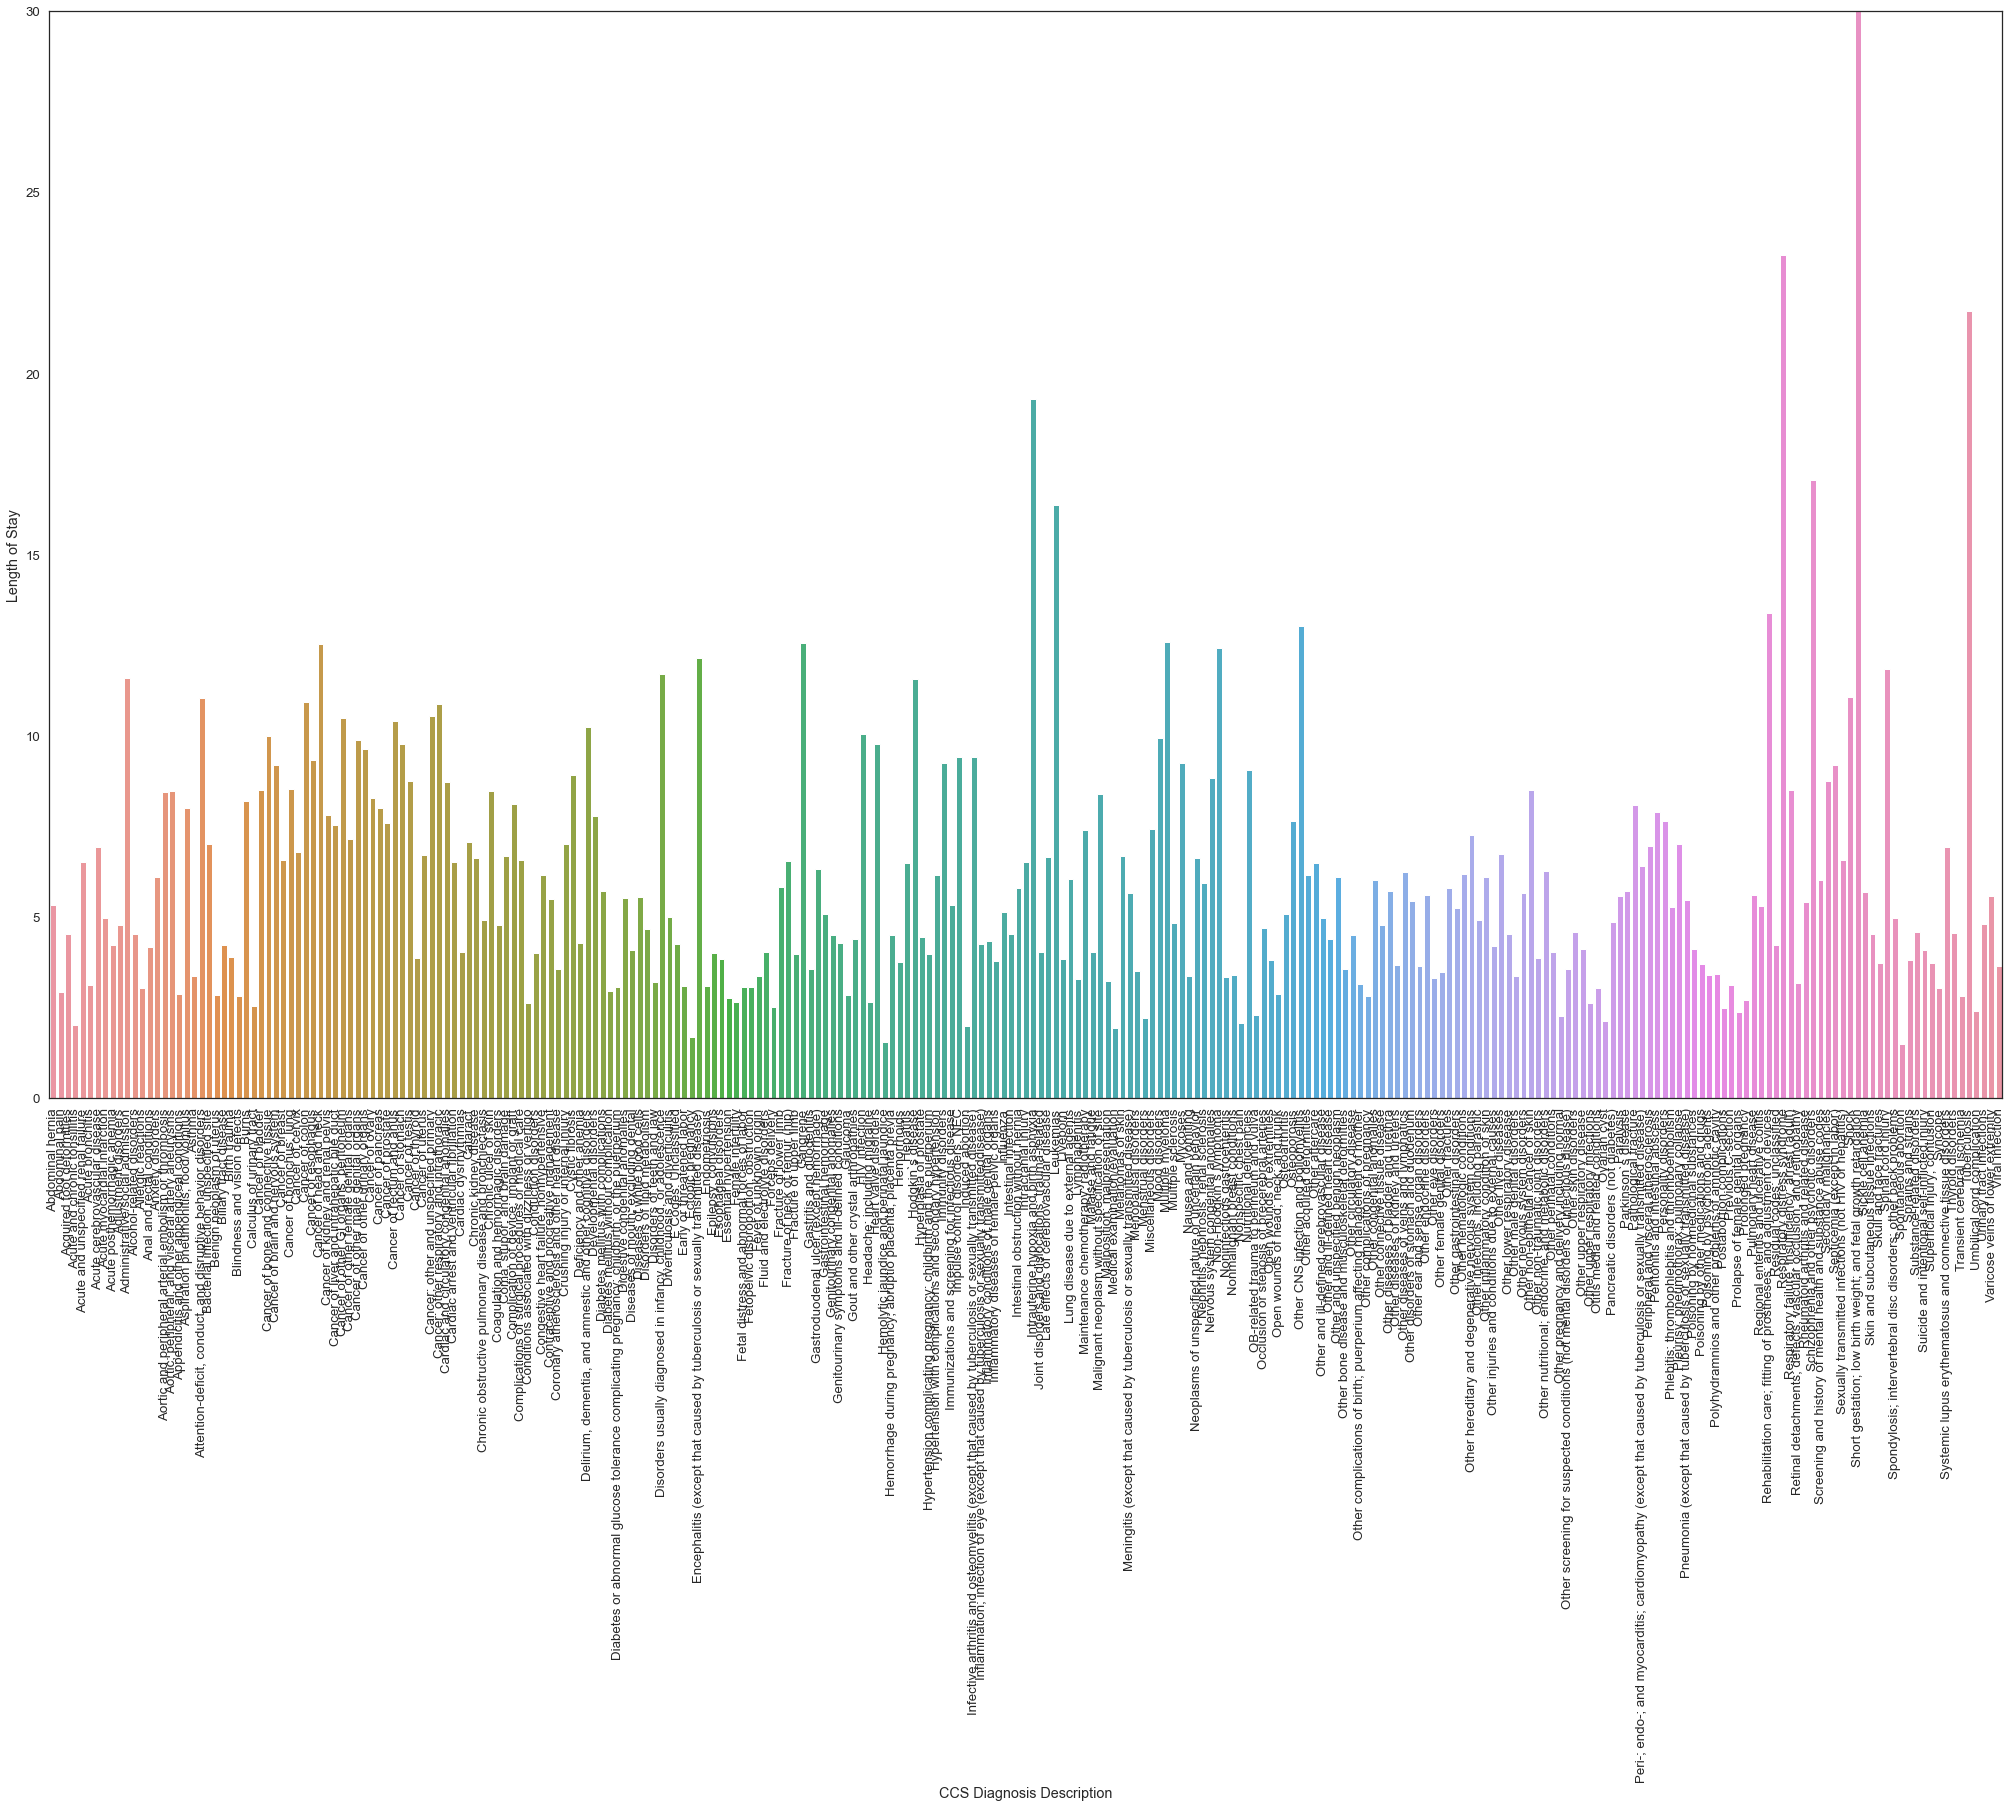

In [40]:
f, ax = plt.subplots(figsize=(35, 20))
sb.barplot(x="CCS Diagnosis Description", y="Length of Stay", data=TYPE4[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description', as_index=False).mean())
ax.set(ylim=(0, 30))
plt.xticks(rotation=90)
plt.show()

In [41]:
diag_stay_df = TYPE4[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description', as_index=False).mean()
diag_stay_df = diag_stay_df.sort_values(by='Length of Stay', ascending=False, ignore_index=True)
display(diag_stay_df)

,CCS Diagnosis Description,Length of Stay
0,Short gestation; low birth weight; and fetal g...,43.375000
1,Respiratory distress syndrome,23.260870
2,Tuberculosis,21.707627
3,Intrauterine hypoxia and birth asphyxia,19.280000
4,Schizophrenia and other psychotic disorders,17.051733
...,...,...
258,Induced abortion,2.000000
259,Medical examination/evaluation,1.928571
260,Ectopic pregnancy,1.676911
261,Hemolytic jaundice and perinatal jaundice,1.540220


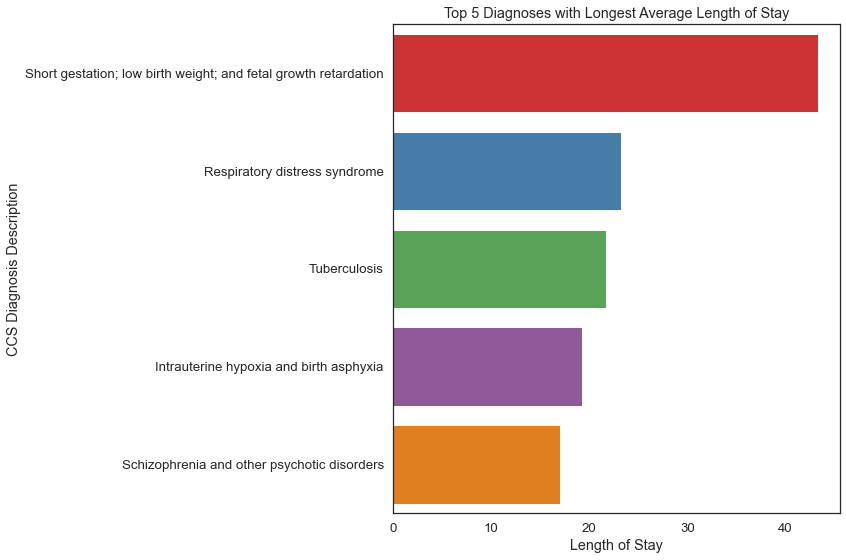

In [42]:
sb.set(font_scale=1.2)
sb.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))
sb.barplot(y="CCS Diagnosis Description", x="Length of Stay", data=diag_stay_df[0:5], palette='Set1')
#plt.xticks(rotation=45)
plt.title('Top 5 Diagnoses with Longest Average Length of Stay')
plt.show()

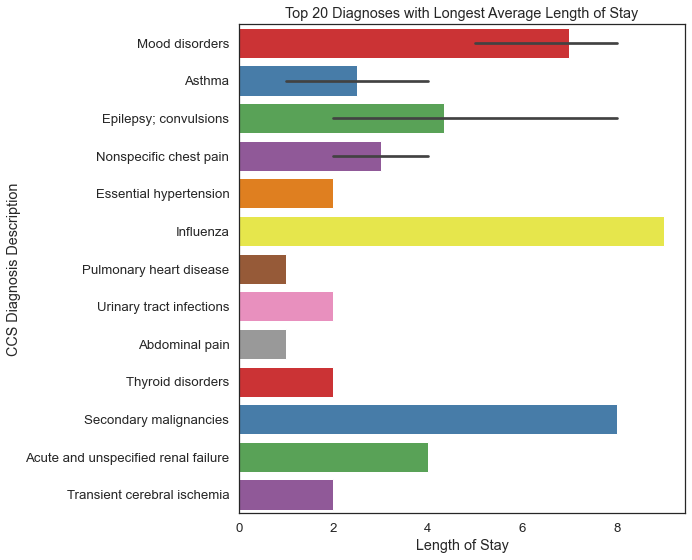

In [43]:
sb.set(font_scale=1.2)
sb.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))
sb.barplot(y="CCS Diagnosis Description", x="Length of Stay", data=HOS_df[0:20], palette='Set1')
#plt.xticks(rotation=45)
plt.title('Top 20 Diagnoses with Longest Average Length of Stay')
plt.show()

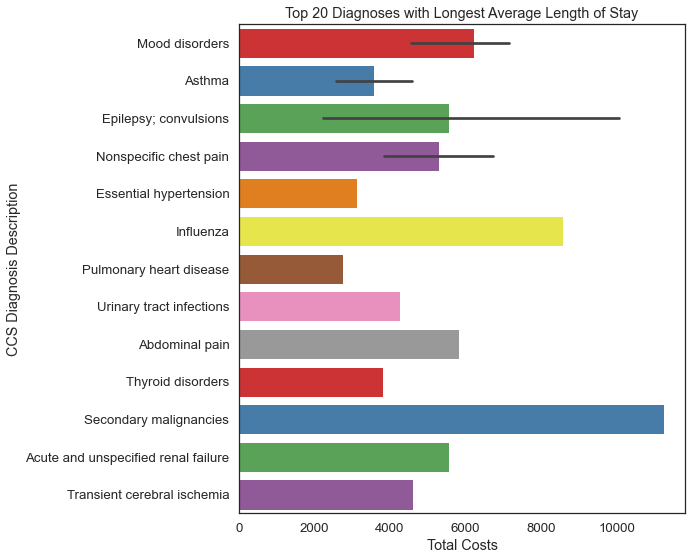

In [44]:
sb.set(font_scale=1.2)
sb.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))
sb.barplot(y="CCS Diagnosis Description", x="Total Costs", data=HOS_df[0:20], palette='Set1')
#plt.xticks(rotation=45)
plt.title('Top 20 Diagnoses with Longest Average Length of Stay')
plt.show()

<AxesSubplot:xlabel='Length of Stay', ylabel='Total Costs'>

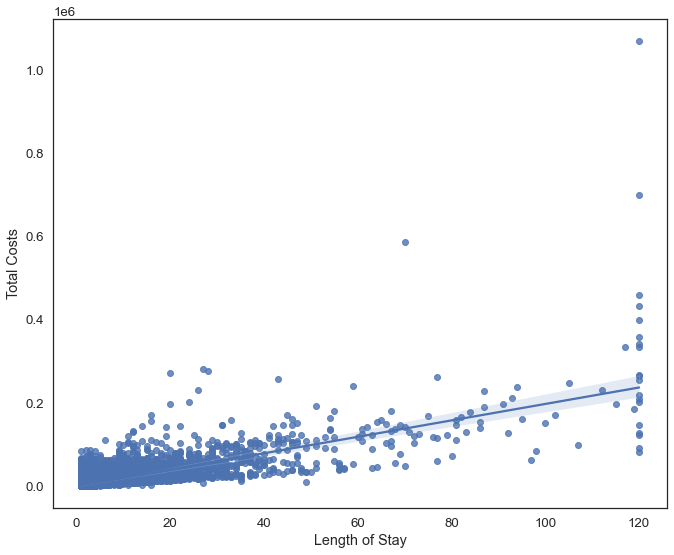

In [45]:
f, ax = plt.subplots(figsize=(11, 9))
sb.regplot(x="Length of Stay", y="Total Costs",
            data=TYPE4[0:20000])

<AxesSubplot:xlabel='Length of Stay', ylabel='Total Costs'>

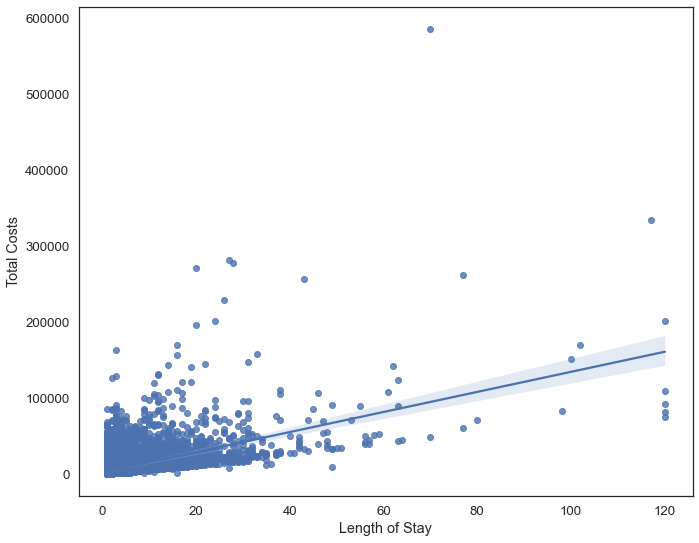

In [46]:
f, ax = plt.subplots(figsize=(11, 9))
sb.regplot(x="Length of Stay", y="Total Costs",
            data=HOS_df[0:20000])

<AxesSubplot:xlabel='Length of Stay', ylabel='Total Costs'>

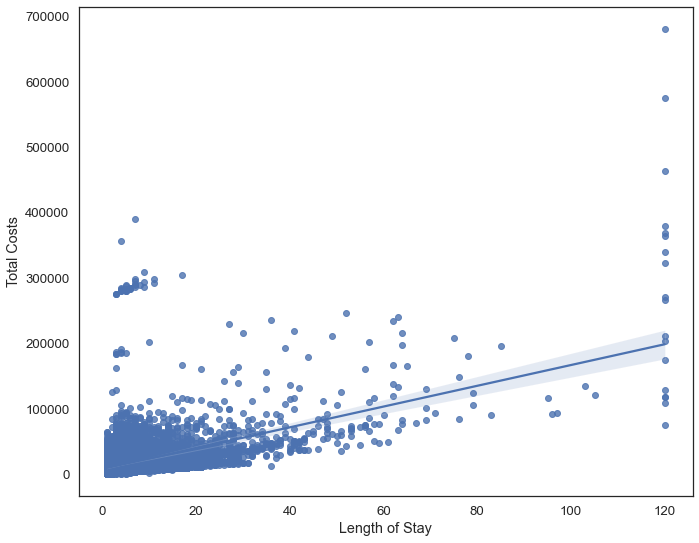

In [47]:
f, ax = plt.subplots(figsize=(11, 9))
sb.regplot(x="Length of Stay", y="Total Costs",
            data=TYPE3[0:20000])

<AxesSubplot:xlabel='Length of Stay', ylabel='Total Costs'>

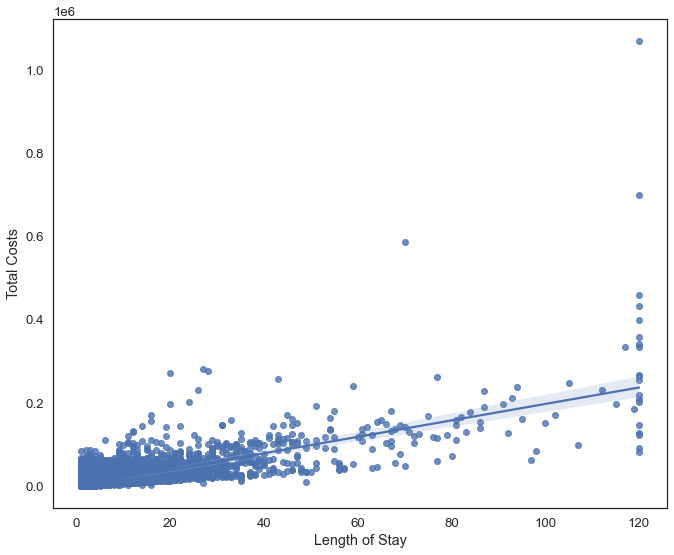

In [48]:
f, ax = plt.subplots(figsize=(11, 9))
sb.regplot(x="Length of Stay", y="Total Costs",
            data=TYPE5[0:20000])

<AxesSubplot:xlabel='Length of Stay', ylabel='Total Costs'>

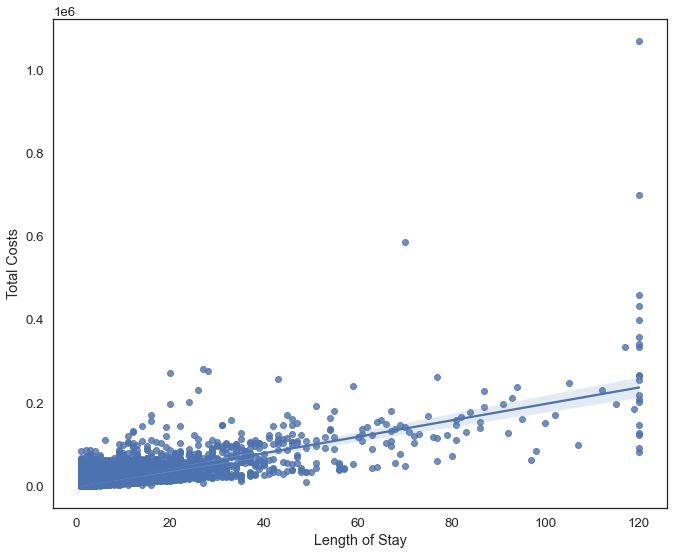

In [49]:
f, ax = plt.subplots(figsize=(11, 9))
sb.regplot(x="Length of Stay", y="Total Costs",
            data=TYPE6[0:20000])

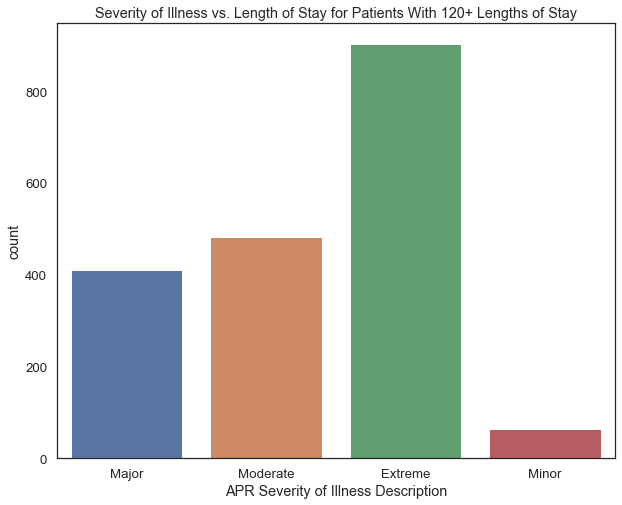

In [50]:
f, ax = plt.subplots(figsize=(10, 8))
sb.countplot(x='APR Severity of Illness Description', data = HOS_df[HOS_df['Length of Stay']==120])
plt.title('Severity of Illness vs. Length of Stay for Patients With 120+ Lengths of Stay')
plt.show()

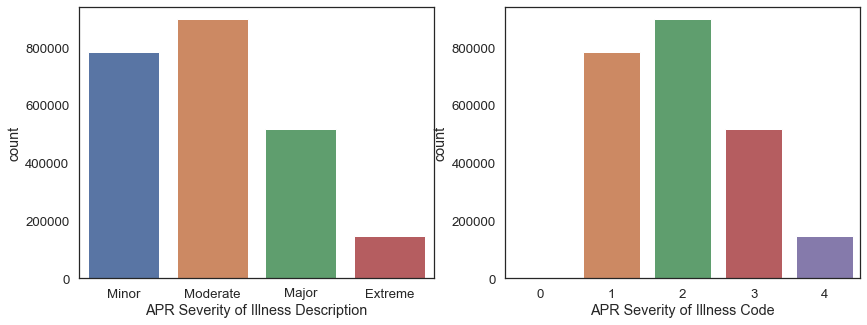

In [51]:
fig, ax =plt.subplots(1,2, figsize=(14,5))
sb.countplot(HOS_df['APR Severity of Illness Description'], ax=ax[0])
sb.countplot(HOS_df['APR Severity of Illness Code'], ax=ax[1])
fig.show()

In [52]:
hos_sql_df_1= HOS_df

In [53]:
hos_sql_df_1.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                           int64
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [54]:
hos_sql_df_1 = hos_sql_df_1.drop(['Zip Code - 3 digits'], axis=1) #use average income as a feature instead
hos_sql_df_1 = hos_sql_df_1.drop(['Facility Name'], axis=1)
hos_sql_df_1 = hos_sql_df_1.drop(['CCS Diagnosis Description'], axis=1)
hos_sql_df_1 = hos_sql_df_1.drop(['CCS Procedure Description'], axis=1)
hos_sql_df_1 = hos_sql_df_1.drop(['APR DRG Description'], axis=1)
hos_sql_df_1 = hos_sql_df_1.drop(['APR MDC Description'], axis=1)
hos_sql_df_1 = hos_sql_df_1.drop(['Discharge Year'], axis=1)    #since these are all 2015 since the dataset is from 2015 inpatient records
hos_sql_df_1 = hos_sql_df_1.drop(['Operating Certificate Number'], axis=1)  #drop this column since it should not be a predictor for inpatient length of stay
hos_sql_df_1 = hos_sql_df_1.drop(['Ethnicity'], axis=1) #contains less information than and is contained within the Race column, so let's drop
hos_sql_df_1 = hos_sql_df_1.drop(['Hospital County'], axis=1) #lets drop hospital county column for computational efficiency
hos_sql_df_1 = hos_sql_df_1.drop(['Birth Weight'], axis=1) #Now we will drop birth weight, which we looked at up above
hos_sql_df_1 = hos_sql_df_1.drop(['Attending Provider License Number'], axis=1) #to enable generalization of model to any attending providers
hos_sql_df_1 = hos_sql_df_1.drop(['Patient Disposition'], axis=1) #data leakage feature

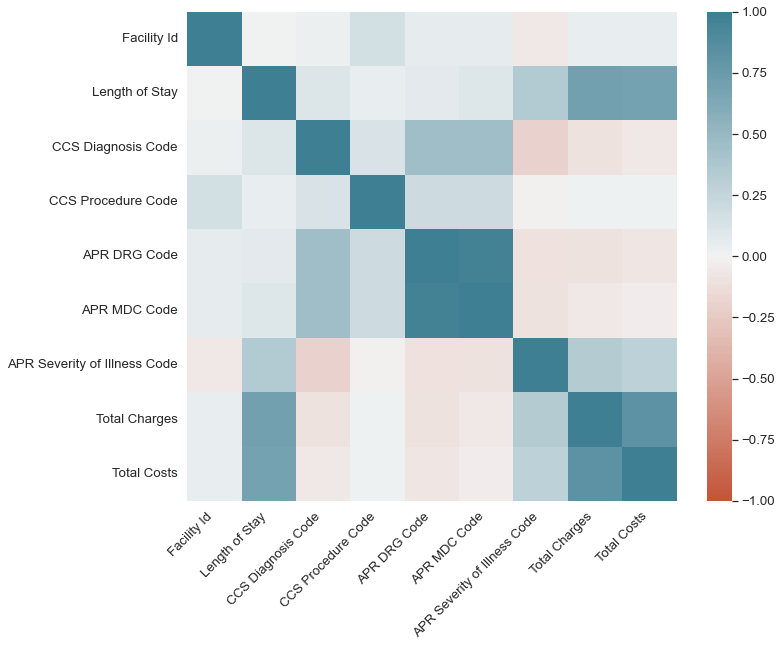

In [55]:
f, ax = plt.subplots(figsize=(11, 9))
corr = hos_sql_df_1.corr()
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [56]:
X = hos_sql_df_1[['CCS Diagnosis Code','CCS Procedure Code','APR Severity of Illness Code','Total Charges','Total Costs']]
y = hos_sql_df_1[['Length of Stay']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [57]:

reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
y_round_pred = np.ndarray.round(y_pred)
y_round_train_pred = np.ndarray.round(y_train_pred)
test_acc = accuracy_score(y_test, y_round_pred)
train_acc = accuracy_score(y_train, y_round_train_pred)
print(mse_test)
print(mse_train)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

27.163198884367723
27.065978353683867
Test accuracy: 0.22376950916724903
Train accuracy: 0.22503001098170608


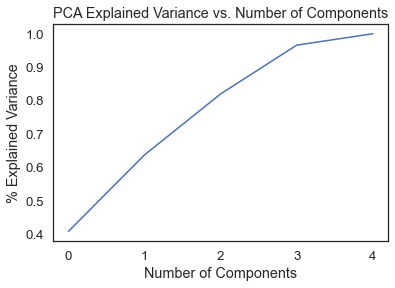

In [58]:
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca1 = PCA()
pca1.fit(x_train)
explained_variance_ratio = pca1.explained_variance_ratio_
pc_vs_variance = np.cumsum(pca1.explained_variance_ratio_)
plt.plot(pc_vs_variance)
plt.xlabel('Number of Components')
plt.ylabel('% Explained Variance')
plt.title('PCA Explained Variance vs. Number of Components')
plt.show()

In [59]:
variance_95 = list(filter(lambda i: i > 0.95, pc_vs_variance))[0]
component_95 = pc_vs_variance.tolist().index(variance_95)
print(component_95)

#perform the dimensionality reduction
pca2 = PCA(n_components=component_95)
x_train = pca2.fit_transform(x_train)
x_test = pca2.transform(x_test)

3


In [60]:
pc_df = pd.DataFrame(pca2.components_,columns=X_train.columns)
top_pc = pc_df[0:1]
display(top_pc)

,CCS Diagnosis Code,CCS Procedure Code,APR Severity of Illness Code,Total Charges,Total Costs
0,-0.164068,-0.005159,0.406746,0.640927,0.62994


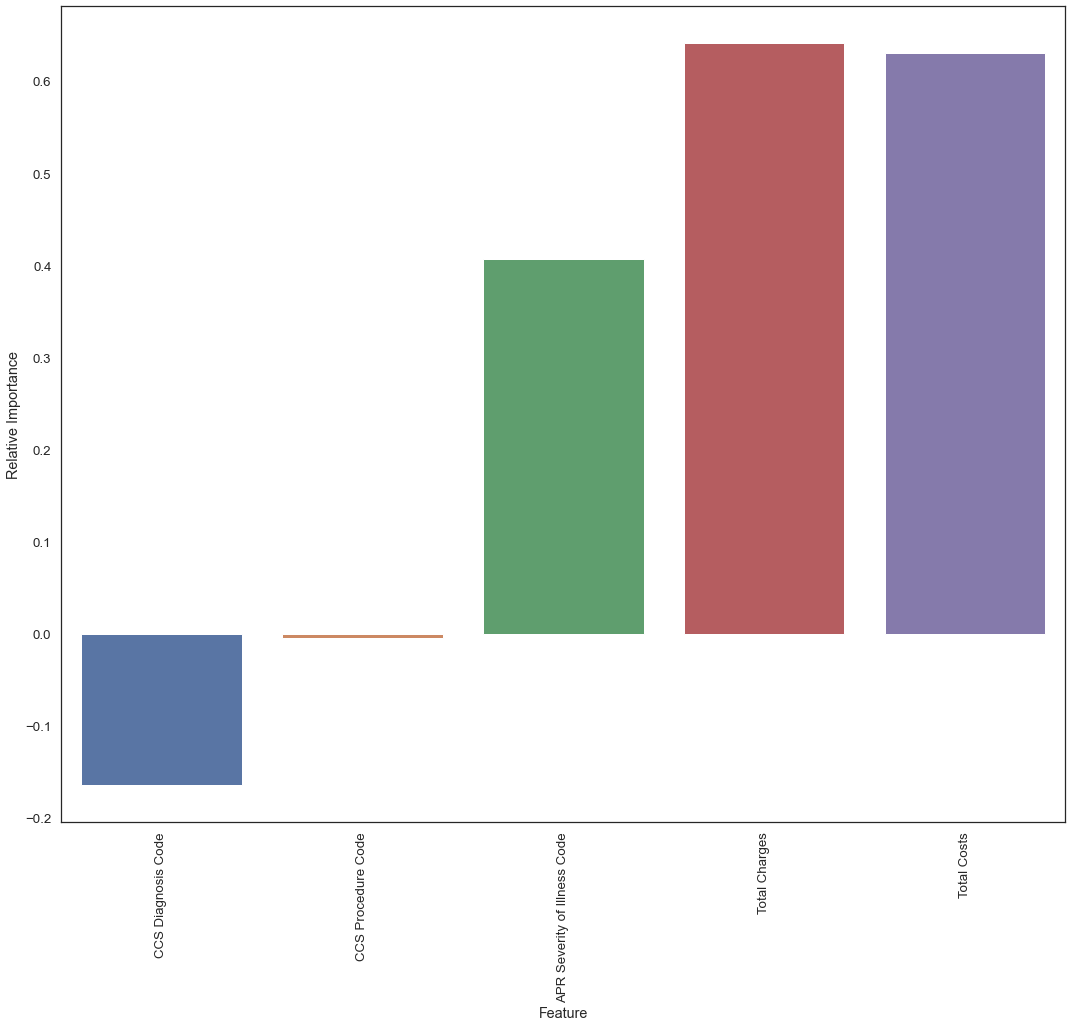

In [61]:
op_pc = top_pc.abs()
list_magnitude = top_pc.loc[0, :].values.tolist()
labels = top_pc.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': labels, 'Relative Importance': list_magnitude})
#feature_importance_df = feature_importance_df.nlargest(10, 'Relative Importance')

fig, ax =plt.subplots(figsize=(18,15))
sb.barplot(x='Feature', y='Relative Importance', data=feature_importance_df.reset_index())
plt.xticks(rotation=90)
plt.show()

In [62]:
#Decision Tree - on non-pca data
#from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
#from sklearn import metrics
train_predictions = dtree.predict(X_train)
test_predictions = dtree.predict(X_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.9999610405105641
Test Accuracy: 0.4134267387092559


In [64]:
dtree=DecisionTreeClassifier(max_depth= 10, max_leaf_nodes=150)
dtree.fit(x_train,y_train)

#from sklearn import metrics
train_predictions = dtree.predict(x_train)
test_predictions = dtree.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, train_predictions))
print("Test Accuracy:",metrics.accuracy_score(y_test, test_predictions))

Train Accuracy: 0.3239110213960646
Test Accuracy: 0.31936371848846923


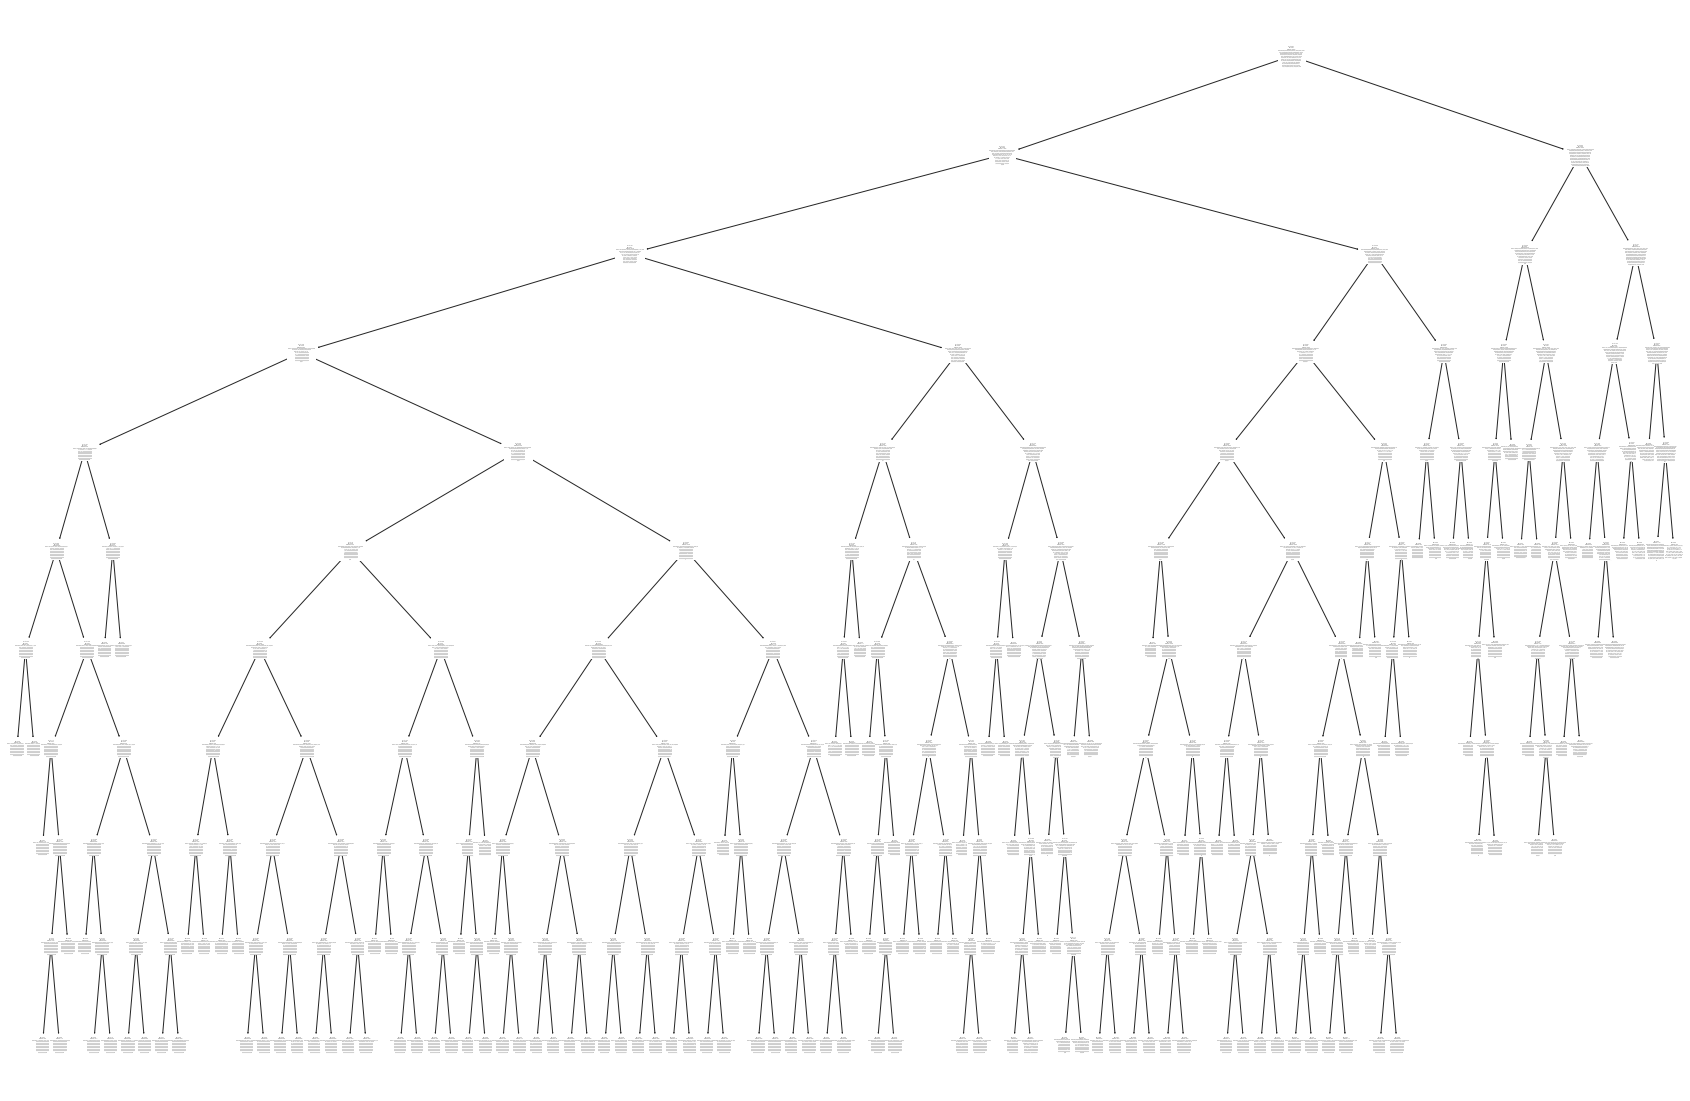

In [65]:
#from sklearn.tree import plot_tree
f, ax = plt.subplots(figsize=(30, 20))
plot_tree(dtree)
plt.show()

In [66]:
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import accuracy_score

clf=DecisionTreeRegressor(max_depth=10, max_leaf_nodes=150)
clf.fit(x_train,y_train)
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

mse_test = mean_squared_error(y_test, test_pred)
mse_train = mean_squared_error(y_train, train_pred)
y_round_pred = np.ndarray.round(test_pred)
y_round_train_pred = np.ndarray.round(train_pred)
test_acc = accuracy_score(y_test, y_round_pred)
train_acc = accuracy_score(y_train, y_round_train_pred)
print(mse_test)
print(mse_train)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

18.250659694750752
17.70894992579975
Test accuracy: 0.2580465549665638
Train accuracy: 0.25788199170649867


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

rf_regressor = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

train_pred = rf_regressor.predict(x_train)
test_pred = rf_regressor.predict(x_test)
mse_train = mean_squared_error(y_train, train_pred)
mse_test = mean_squared_error(y_test, test_pred)
y_round_train_pred = np.round(train_pred)
y_round_test_pred = np.round(test_pred)

train_acc = accuracy_score(y_train, y_round_train_pred)
test_acc = accuracy_score(y_test, y_round_test_pred)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Mean Squared Error (Train): 34.86583630196526
Mean Squared Error (Test): 35.21987619810576
Train Accuracy: 0.3520671661597875
Test Accuracy: 0.341898333589005


In [68]:
HOS_df['APR Severity of Illness Description'].value_counts(dropna=False)

Moderate    897251
Minor       785526
Major       517129
Extreme     146742
NaN            112
Name: APR Severity of Illness Description, dtype: int64

In [69]:
HOS_df_new = HOS_df.head()
HOS_df_melted = pd.melt(frame = HOS_df_new, id_vars = 'APR MDC Description', value_vars = ['Age Group','Type of Admission'])
HOS_df_melted

,APR MDC Description,variable,value
0,Mental Diseases and Disorders,Age Group,50 to 69
1,Mental Diseases and Disorders,Age Group,18 to 29
2,Mental Diseases and Disorders,Age Group,30 to 49
3,Diseases and Disorders of the Respiratory System,Age Group,50 to 69
4,Diseases and Disorders of the Nervous System,Age Group,50 to 69
5,Mental Diseases and Disorders,Type of Admission,Emergency
6,Mental Diseases and Disorders,Type of Admission,Emergency
7,Mental Diseases and Disorders,Type of Admission,Emergency
8,Diseases and Disorders of the Respiratory System,Type of Admission,Emergency
9,Diseases and Disorders of the Nervous System,Type of Admission,Emergency


In [70]:
HOS_df_data1=HOS_df['APR MDC Description'].tail()
HOS_df_data2=HOS_df['Age Group'].tail()

conc_hos_df_col=pd.concat([HOS_df_data1,HOS_df_data2],axis=1)
conc_hos_df_col

,APR MDC Description,Age Group
2346755,Diseases and Disorders of the Nervous System,70 or Older
2346756,Diseases and Disorders of the Musculoskeletal ...,50 to 69
2346757,Mental Diseases and Disorders,50 to 69
2346758,Diseases and Disorders of the Circulatory System,70 or Older
2346759,Diseases and Disorders of the Respiratory System,30 to 49


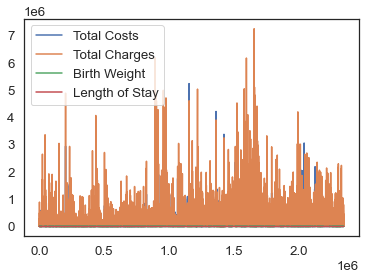

In [71]:
HOS_df_data1=HOS_df.loc[:,["Total Costs","Total Charges","Birth Weight","Length of Stay"]]
HOS_df_data1.plot()
plt.show()

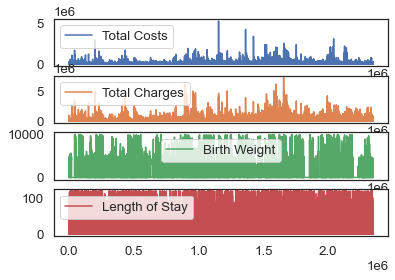

In [72]:
HOS_df_data1.plot(subplots=True)
plt.show()

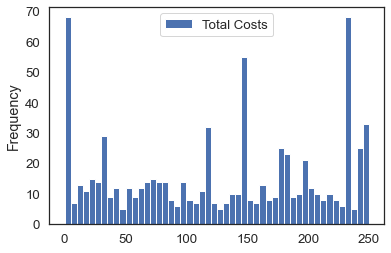

In [73]:
HOS_df_data1.plot(kind="hist",y="Total Costs",bins=50,range=(0,250))
plt.show()

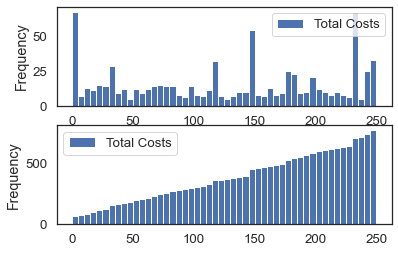

In [74]:
fig,axes=plt.subplots(nrows=2,ncols=1)

HOS_df_data1.plot(kind="hist",y="Total Costs",bins=50,range=(0,250),ax=axes[0])
HOS_df_data1.plot(kind="hist",y="Total Costs",bins=50,range=(0,250),ax=axes[1],cumulative=True)

plt.show()

In [75]:
print(HOS_df.loc[85,['APR DRG Description']])
#selecting only some columns
HOS_df[["APR DRG Description","Age Group","Length of Stay","Total Costs"]].head(20)

APR DRG Description    Asthma
Name: 85, dtype: object


,APR DRG Description,Age Group,Length of Stay,Total Costs
0,Bipolar disorders,50 to 69,5,4561.28
1,Bipolar disorders,18 to 29,8,6933.94
2,Bipolar disorders,30 to 49,8,7154.85
3,Asthma,50 to 69,4,4584.11
4,Seizure,50 to 69,3,4361.74
5,Chest pain,50 to 69,2,3835.04
6,Hypertension,70 or Older,2,3130.67
7,Other pneumonia,50 to 69,9,8574.89
8,Seizure,70 or Older,8,10062.13
9,Pulmonary embolism,50 to 69,1,2745.50
